# US 1994 Census Database

### Contents Index

- __1. Dataset Description__
- __2. Handling Missing values and duplicates__
- __3. Numerical variables exploration/relationship and bivariate analysis__
- __4. Categorical variables exploration/relationship and bivariate analysis__
- __5. Target variable exploration__
- __6. Correlation between our variables__
- __7. Handling Outliers__

### 1. Dataset Description

For this term project we will use the Adult dataset that allow us to predict whether an individual income exceeds $50K/yr or not.

This data was extracted by Barry Becker from the United States 1994 Census database.

Each row represents one unique employee currently working at a company on some job position. The columns/features provided for each record are:

- __age__ : age of the person in years
- __workclass__ : is a socioeconomic term used to describe persons in a social class marked by jobs that provide low pay, require limited skill, or physical labor
- __fnlwgt__ : final weight. In other words, this is the number of people the census believes the entry represents
- __education__: the highest level of education achieved by an individual
- __education.num__: the highest level of education achieved in numerical form
- __marital.status__: marital status of an individual
- __occupation__: the general type of occupation of an individual
- __relationship__: represents what this individual is relative to others (unmarried, husband, wife, not-in-family, etc.), is somewhat redundant with marital status.
- __race__: descriptions of an individual’s race
- __sex__: the biological sex of the individual
- __capital-gain__: capital gains for an individual
- __capital-loss__: capital loss for an individual
- __hours.per.week__:  the hours an individual has reported to work per week
- __native.country__:  country of origin for an individual
- __income__: annual salary in US dollars, two possible values "<=50K" or ">50K"

In [1]:
# import required libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv('./2_2nd dataset_adult income.csv')

# visualize the dataset
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 32561
Number of features (columns) in the dataset are: 15
Number of duplicate entries in the dataset are: 24
Number missing values in the dataset are: 0


In [4]:
# show column names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
# Rename our columns to follow a standard snake case
df.columns = df.columns.str.replace('.', '_')

# Show columns names again
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
# data types of each colummn of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# identify our numerical and categorical features, including our target 'income'
numerical_columns = [col for col in df.columns if df[col].dtypes!='O']
categorical_columns = [col for col in df.columns if df[col].dtypes=='O']

print("Number of Numerical Features:   ", len(numerical_columns))
print("Numerical Features:   ", end = '')
print(numerical_columns)
print("Number of Categorical Features:   ", len(categorical_columns))
print("Categorical Features: ", end = '')
print(categorical_columns)

Number of Numerical Features:    6
Numerical Features:   ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Number of Categorical Features:    9
Categorical Features: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Our __numerical__ variables are:
- age
- fnlwgt
- education-num
- capital-gain
- capital-loss
- hours-per-week

Meanwhile, our __categorical__ variables are:
- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex
- native-country
- income __(target variable)__

Now that we know our variable types, we could start a __comprehensive exploration__ of our data. But first, let's __validate and clean our dataset.__

### 2. Handling Missing values and duplicates

First, let's __check__ for __unique values__, as these will lead us to identify missing values properly.

In [8]:
# Checking the unique values in each column
for col in df:
    print(f"\033[94mUnique values in '{col}' column:")
    print(df[col].unique(), end='\n\n')

Unique values in 'age' column:
[90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]

Unique values in 'workclass' column:
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

Unique values in 'fnlwgt' column:
[ 77053 132870 186061 ...  34066  84661 257302]

Unique values in 'education' column:
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

Unique values in 'education_num' column:
[ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]

Unique values in 'marital_status' column:
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

Unique values in 'occupation' column:
['?' '

We rapidly notice there are some rows filled with __“?”__ values.

We should __handle these questions marks as missing values__. Let’s __label properly__.

- It is observed that __'?' symbol__ is appearing in the features: workclass, occupation, and native-country.

- Let's replace the '?' symbol with proper missing values to get rid of them in later steps.

In [9]:
# replace "?" with actual missing values
df.replace("?", np.nan, inplace=True)

In [10]:
# checking for null or missing values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [11]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determine percentage (%) of missing values for each column with missing values
df_missing = df[vars_with_na].isnull().mean().sort_values(ascending=False) * 100

df_missing

occupation        5.660146
workclass         5.638647
native_country    1.790486
dtype: float64

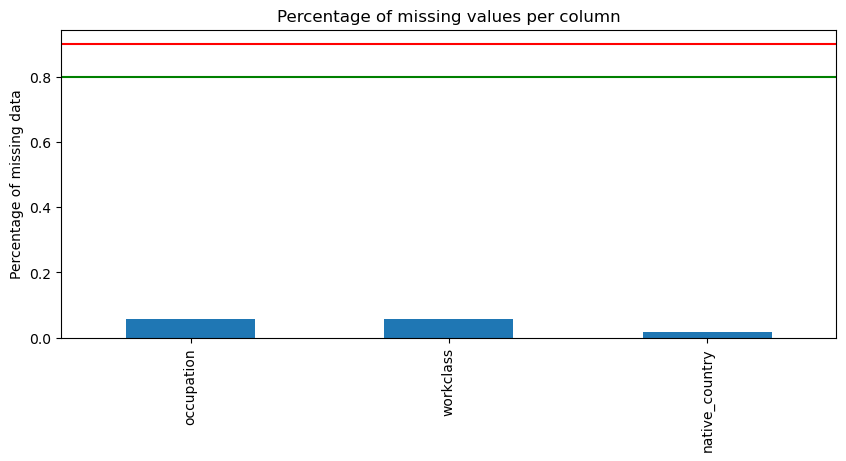

In [12]:
# plot percentage of misssing values for each column with missing values
df[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')
plt.title("Percentage of missing values per column")
plt.show()

We have decided to __drop the rows with missing values because they represent only around 5% of our data__ (for some columns) and 2% for other columns.

As we have few records with missing values, deleting these __won't affect our analysis.__

In [13]:
# Let's drop the rows with missing values as they are very few compared to the entire dataset
df.dropna(inplace=True)

# checking again for null or missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Now that we have __handle the few missing values__, let's check the __existing duplicated rows.__

In [14]:
# Print the number of duplicated rows
print("Number of duplicated rows:", df[df.duplicated()].shape[0])

Number of duplicated rows: 23


In [15]:
# Visualize some duplicated rows
df[df.duplicated()].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [16]:
# Let's get rid of duplicate entries as they won't add value to our analysis

df.drop_duplicates(keep='first',inplace=True)

# Again check the dataset shape, after removing the duplicate entries

print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 30139
Number of features (columns) in the dataset are: 15
Number of duplicate entries in the dataset are: 0
Number missing values in the dataset are: 0


### 3. Numerical variables exploration/relationship and bivariate analysis

Now, let's explore each of our numerical columns.
- age
- fnlwgt
- education-num
- capital-gain
- capital-loss
- hours-per-week

In [17]:
# statistically describe our dataset (only numerical columns)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30139.0,38.441720,13.131426,17.0,28.0,37.0,47.0,90.0
fnlwgt,30139.0,189795.025980,105658.624341,13769.0,117627.5,178417.0,237604.5,1484705.0
education_num,30139.0,10.122532,2.548738,1.0,9.0,10.0,13.0,16.0
capital_gain,30139.0,1092.841202,7409.110596,0.0,0.0,0.0,0.0,99999.0
capital_loss,30139.0,88.439928,404.445239,0.0,0.0,0.0,0.0,4356.0
hours_per_week,30139.0,40.934703,11.978753,1.0,40.0,40.0,45.0,99.0


<Axes: title={'center': 'Histogram: Age of the Individual'}, xlabel='age', ylabel='Density'>

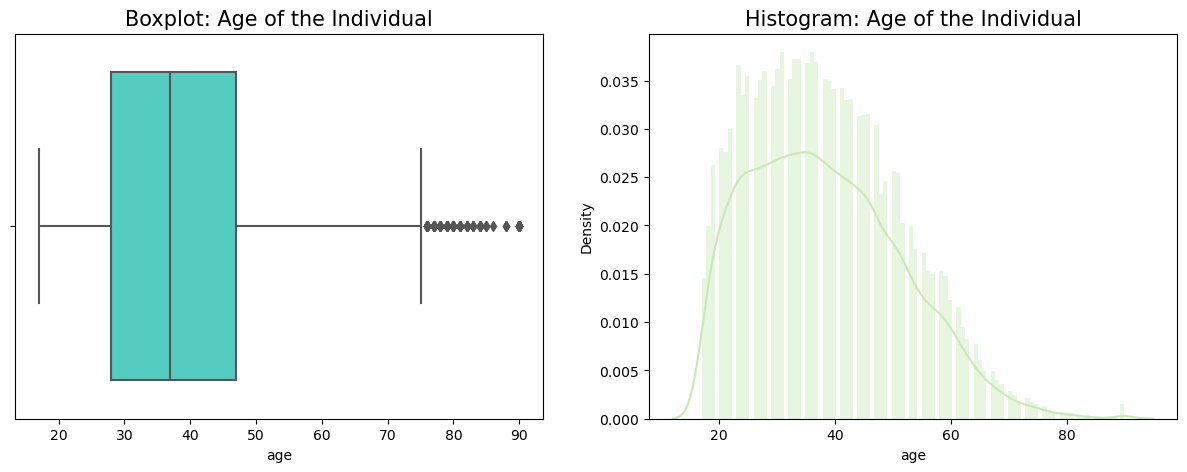

In [18]:
# Plot a boxplot and histogram to understand the distribution of our numerical variable: 'Age' and identify outliers
plt.subplots(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Boxplot: Age of the Individual', fontdict={'fontsize':15})
sns.boxplot(x=df['age'], color='#40E0D0')

plt.subplot(1,2,2)
plt.title('Histogram: Age of the Individual', fontdict={'fontsize':15})
sns.distplot(df['age'], color="#c7e9b4", bins=98)

In [19]:
#skewness and kurtosis of Age
print("Skewness: %f" % df['age'].skew())
print("Kurtosis: %f" % df['age'].kurt())

Skewness: 0.528971
Kurtosis: -0.149394


__Observations (Age variable):__
- Most individuals on our dataset are aged between 28 and 47 years old.
- Some individuals working are 75 years old or older, this could signify possible outliers.
- The distribution is somewhat positive skewed, meaning that most of the individuals are from relative younger ages (left side of the plots)
- The kurtosis is nearly zero, meaning that values are not muchspread across all possible values ranging from 17 to 90.

<Axes: title={'center': 'Histogram: Hours-per-Week'}, xlabel='hours_per_week', ylabel='Density'>

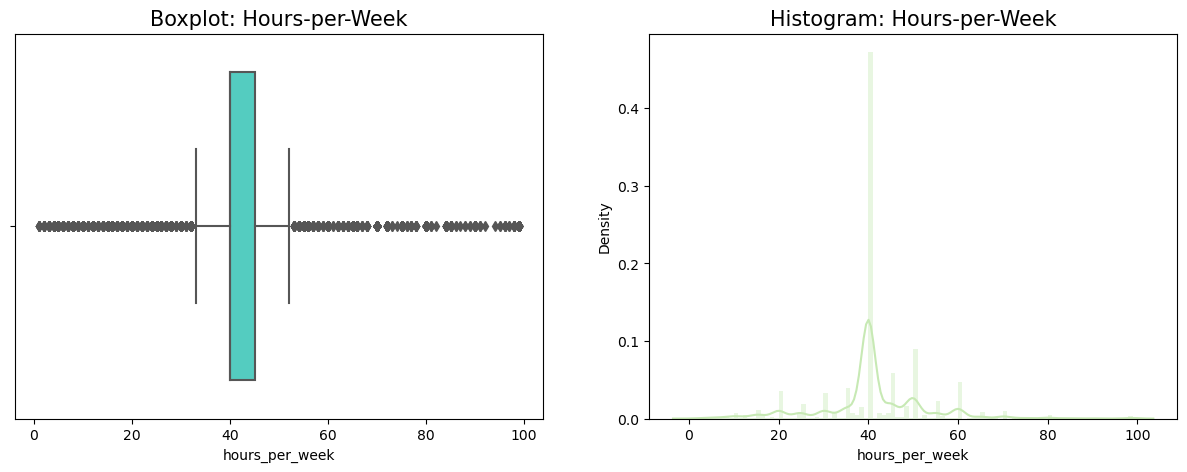

In [20]:
# Plot a boxplot and histogram to understand the distribution of our numerical variable: 'Hours-per-Week' and identify outliers
plt.subplots(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Boxplot: Hours-per-Week', fontdict={'fontsize':15})
sns.boxplot(x=df['hours_per_week'], color='#40E0D0')

plt.subplot(1,2,2)
plt.title('Histogram: Hours-per-Week', fontdict={'fontsize':15})
sns.distplot(df['hours_per_week'], color="#c7e9b4", bins=98)

In [21]:
#skewness and kurtosis of Hours per Week
print("Skewness: %f" % df['hours_per_week'].skew())
print("Kurtosis: %f" % df['hours_per_week'].kurt())

Skewness: 0.332386
Kurtosis: 3.169360


__Observations (Hours per week):__
- As expected, most individuals work around 40 hours per week, although there is an interesting peak around 50 hours and 60 hours as well.
- Skewness is near zero, meaning data presents a symmetrical distribution
- Kurtosis is near 3, meaning our data presents a somewhat normal distribution.
- Some individuals work more than 80 hours a week, which is exhausting even for young people, these could signify possible outliers.

<Axes: title={'center': 'Histogram: Final Weight'}, xlabel='fnlwgt', ylabel='Density'>

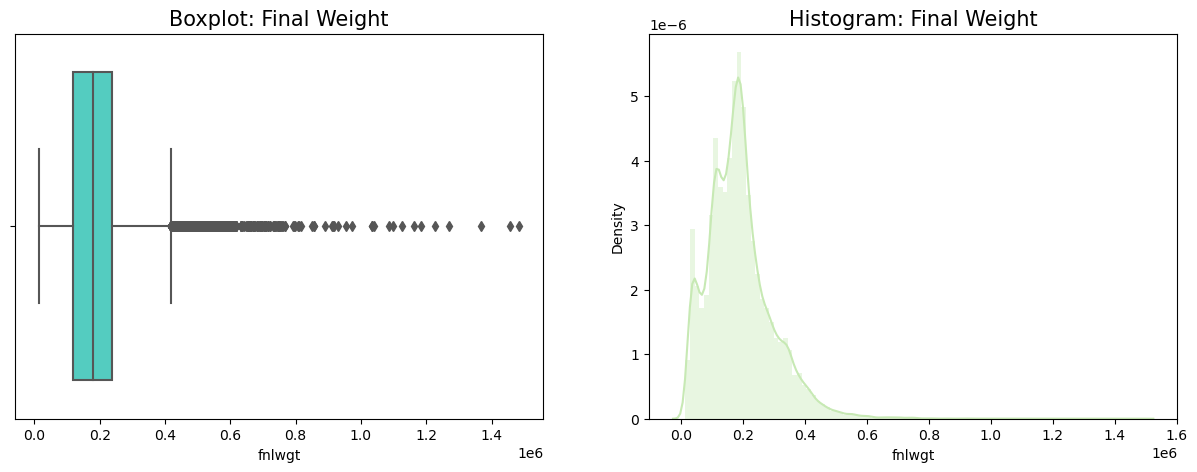

In [22]:
# Plot a boxplot and histogram to understand the distribution of our numerical variable: 'Final Weight'
plt.subplots(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Boxplot: Final Weight', fontdict={'fontsize':15})
sns.boxplot(x=df['fnlwgt'], color='#40E0D0')

plt.subplot(1,2,2)
plt.title('Histogram: Final Weight', fontdict={'fontsize':15})
sns.distplot(df['fnlwgt'], color="#c7e9b4", bins=98)

In [23]:
#skewness and kurtosis of Final Weight
print("Skewness: %f" % df['fnlwgt'].skew())
print("Kurtosis: %f" % df['fnlwgt'].kurt())

Skewness: 1.460055
Kurtosis: 6.397937


__Observations (final weight):__
- Most values of Final Weight are located to the left side (positive skewness)
- There are a significant number of outliers on the right side, meaning some individuals represent a larger population from the US.
- This variable appears to be merely informative, with less contribution to our target variable (salary). However is interesting to know how were individuals weighted on our sample.

<Axes: title={'center': 'Histogram: Education Number'}, xlabel='education_num', ylabel='Density'>

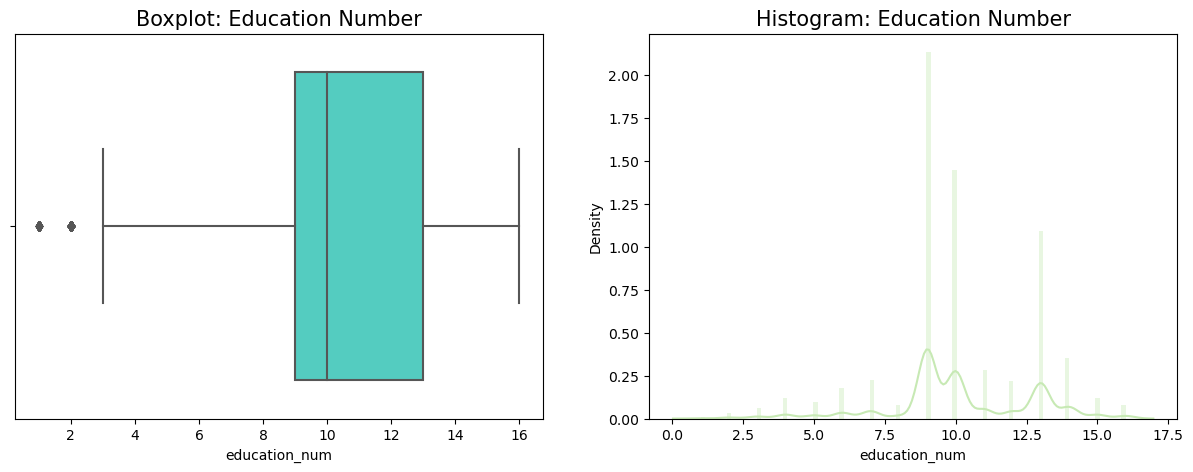

In [24]:
# Plot a boxplot and histogram to understand the distribution of our numerical variable: 'Education Number'
plt.subplots(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Boxplot: Education Number', fontdict={'fontsize':15})
sns.boxplot(x=df['education_num'], color='#40E0D0')

plt.subplot(1,2,2)
plt.title('Histogram: Education Number', fontdict={'fontsize':15})
sns.distplot(df['education_num'], color="#c7e9b4", bins=98)

In [25]:
#skewness and kurtosis of Education Number
print("Skewness: %f" % df['education_num'].skew())
print("Kurtosis: %f" % df['education_num'].kurt())

Skewness: -0.302845
Kurtosis: 0.638573


__Observations (education number):__
- There are few outliers, with an exception of some individuals showing the lowest possible education.
- There are 3 important peaks on education levels 9, 10, and 13: HS-grad, Some-college, Bachelors
- Skewness is near zero, meaning data presents a symmetrical distribution
- Kurtosis is nearly zero, meaning data is spread across all possible values.

<Axes: title={'center': 'Histogram: Capital Loss'}, xlabel='capital_loss', ylabel='Density'>

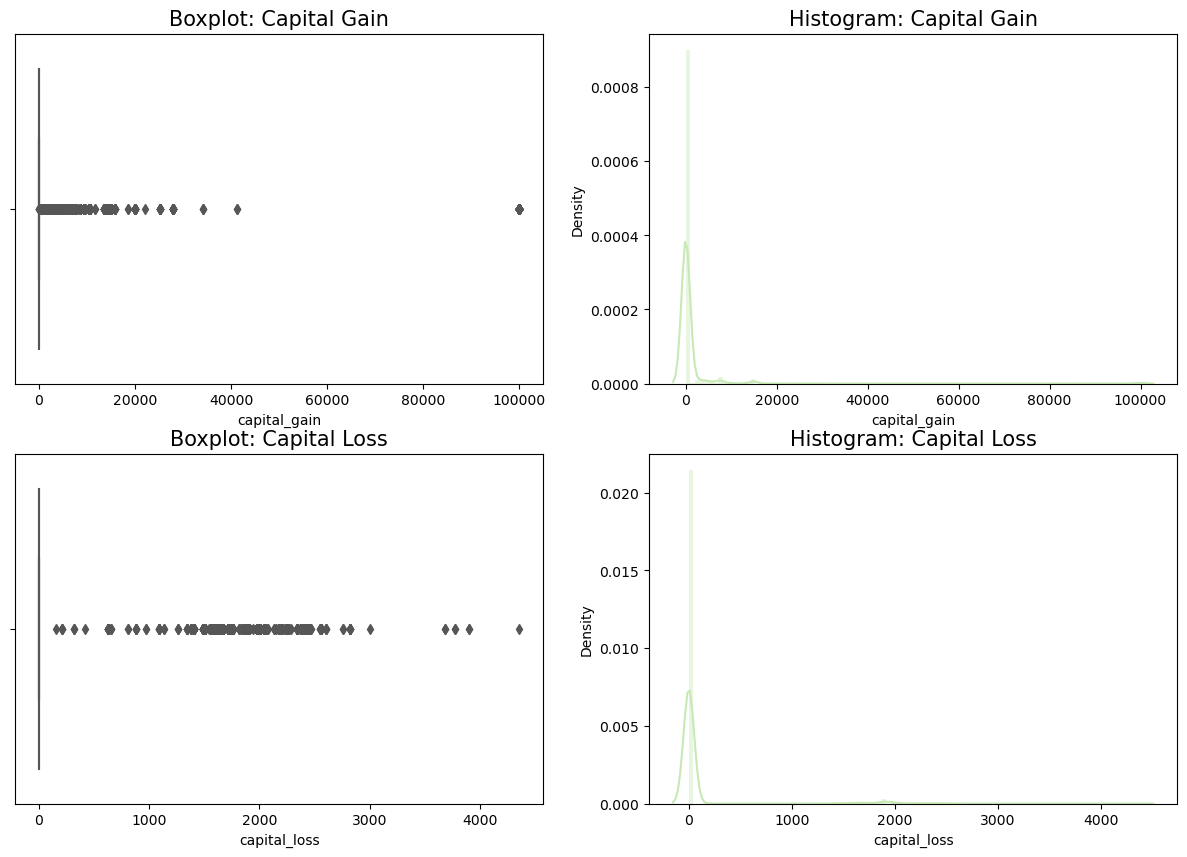

In [26]:
# Plot a boxplot and histogram to understand the distributions of our numerical variables: 'Capital Gain' and 'Loss Gain'
plt.subplots(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('Boxplot: Capital Gain', fontdict={'fontsize':15})
sns.boxplot(x=df['capital_gain'], color='#40E0D0')

plt.subplot(2,2,2)
plt.title('Histogram: Capital Gain', fontdict={'fontsize':15})
sns.distplot(df['capital_gain'], color="#c7e9b4", bins=98)

plt.subplot(2,2,3)
plt.title('Boxplot: Capital Loss', fontdict={'fontsize':15})
sns.boxplot(x=df['capital_loss'], color='#40E0D0')

plt.subplot(2,2,4)
plt.title('Histogram: Capital Loss', fontdict={'fontsize':15})
sns.distplot(df['capital_loss'], color="#c7e9b4", bins=98)

In [27]:
#skewness and kurtosis of Capital Gain
print("Skewness: %f" % df['capital_gain'].skew())
print("Kurtosis: %f" % df['capital_gain'].kurt(), end='\n\n')
#skewness and kurtosis of Capital Loss
print("Skewness: %f" % df['capital_loss'].skew())
print("Kurtosis: %f" % df['capital_loss'].kurt())

Skewness: 11.898104
Kurtosis: 153.546769

Skewness: 4.524409
Kurtosis: 19.492329


__Observations (capital gain vs capital loss):__
- Both variables seem to be falling around zero, with plenty of outliers showing bigger values, probably dragging the mean
- This could mean individuals dont increase or lose their capital in a year, meaning they spend as much as they earn.
- When comparing Gain vs Loss, more individuals lose more in a year that what they earn, however the people that show capital gain have higher maximums than the ones that show capital loss.
- We have extreme values for skewness and kurtosis, meaning our distributions are right-skewed with lots of values falling around zero.

### 4. Categorical variables exploration/relationship  and bivariate analysis

Now let's explore our 9 categorical variables including our target variable, income.

In [28]:
print('Number of categorical variables: ', len(categorical_columns))

Number of categorical variables:  9


In [29]:
# let's visualise the values of the categorical variables
df[categorical_columns].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


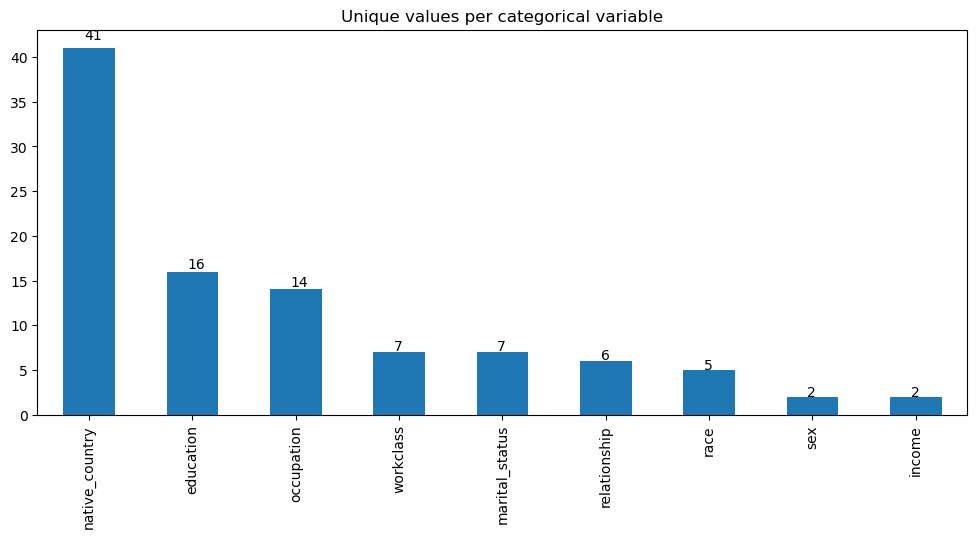

In [30]:
# We count unique categories with pandas unique() and then plot them in descending order
df_plot = df[categorical_columns].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5), title="Unique values per categorical variable")

# plot bar labels (number of unique values per column)
for p in df_plot.patches:
    df_plot.annotate(str(p.get_height()), (p.get_x() + 0.2, p.get_height() * 1.025))

As we can see, native country has the __most unique values__ from all of our categorical columns.

We should then identify __which of these variables are ordinal__ and which are __nominal__.

In [31]:
# Unique values categories in each categorical variable

for col in categorical_columns:
    print(f"\033[94mUnique values in '{col}' column:")
    print(df[col].unique(), end='\n\n')

Unique values in 'workclass' column:
['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay']

Unique values in 'education' column:
['HS-grad' '7th-8th' 'Some-college' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-voc' '1st-4th' '5th-6th' 'Assoc-acdm'
 '12th' '9th' 'Preschool']

Unique values in 'marital_status' column:
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

Unique values in 'occupation' column:
['Exec-managerial' 'Machine-op-inspct' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Transport-moving' 'Sales' 'Craft-repair'
 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Handlers-cleaners'
 'Armed-Forces' 'Priv-house-serv']

Unique values in 'relationship' column:
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

Unique values in 'race' column:
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']



Based on the unique values of each column we can identify the following

__Ordinal variables:__
- education

__Nominal variables:__
- workclass
- marital_status
- occupation
- relationship
- race
- sex
- native_country

__Target:__
- income

In [32]:
# define a function that returns the income target grouped by a certain categorical variable from our dataset
def get_income_by_categorical_variable(df, cat_var):
    income_by_cat_var = df.groupby([cat_var, 'income']).size().unstack(fill_value=0)

    income_by_cat_var['>50K'] = income_by_cat_var['>50K'] / (income_by_cat_var['>50K'] + income_by_cat_var['<=50K'])
    income_by_cat_var['<=50K'] = 1 - income_by_cat_var['>50K']

    return income_by_cat_var.sort_values(by='>50K', ascending=False)

# defines a function that plots a stacked bar plot using Seaborn and our income grouped by any categorical variable
def plot_income_by_categorical_variable(income_by_cat_var, cat_var_label):
    plt.figure(figsize=(12, 8))
    sns.set(style='whitegrid')

    sns.barplot(x=income_by_cat_var.index, y=income_by_cat_var['>50K'], color='green', label='>50K')
    sns.barplot(x=income_by_cat_var.index, y=income_by_cat_var['<=50K'], color='red', bottom=income_by_cat_var['>50K'], label='<=50K')

    plt.title('Proportion of Income by ' + cat_var_label)
    plt.xlabel(cat_var_label)
    plt.ylabel('Proportion')
    plt.legend()
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()

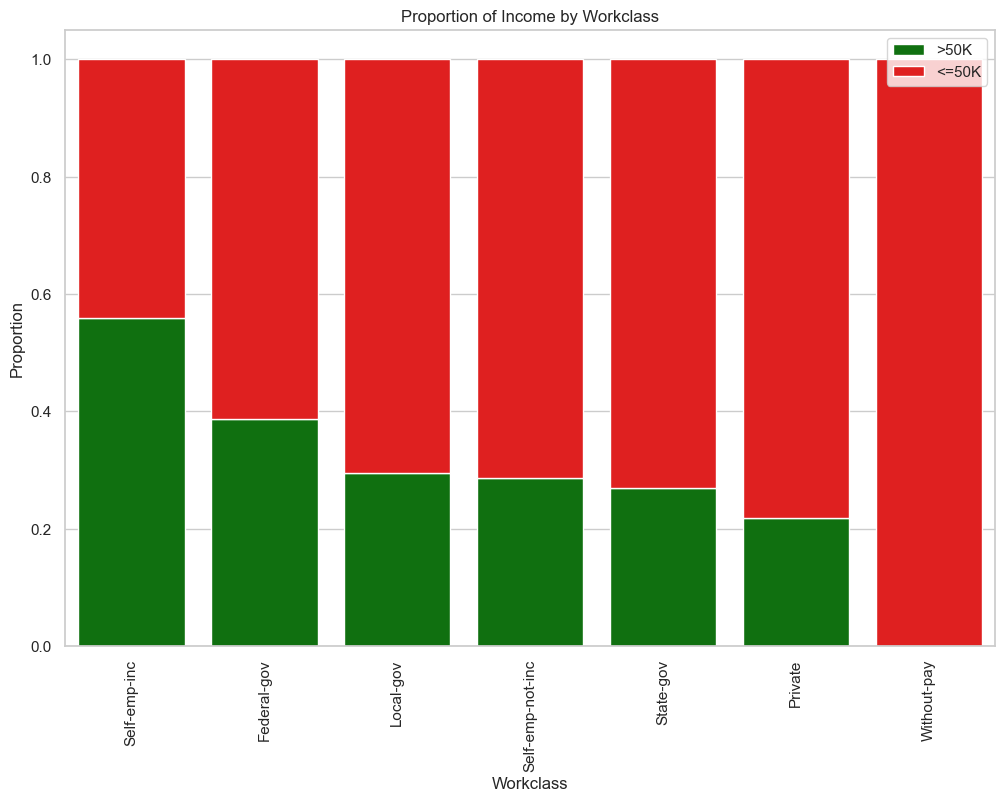

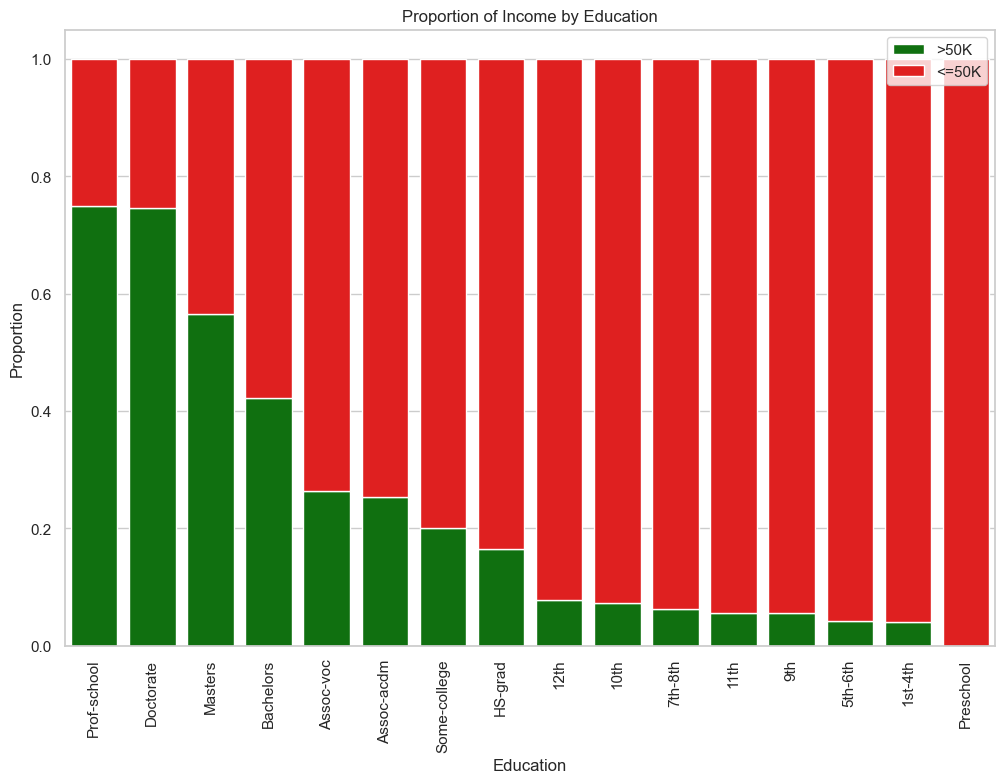

In [33]:
# group 'income' by value of 'workclass'
income_by_relationship = get_income_by_categorical_variable(df, 'workclass')

# plot categorical variable 'workclass' against 'income'
plot_income_by_categorical_variable(income_by_relationship, 'Workclass')

# group 'income' by value of 'education'
income_by_relationship = get_income_by_categorical_variable(df, 'education')

# plot categorical variable 'education' against 'income'
plot_income_by_categorical_variable(income_by_relationship, 'Education')

__Observations:__
- __Education:__ most individuals earning less than 50k dollars are High School graduates, college graduates or bachelors.
- All education levels that are under High School graduates present near 100% chance of earning < 50k dollars.
- Most individuals earning more than 50k dollars are Bachelors, Masters, Doctorates and Prof-School.
- __Workclass:__ The private sector presents a 75% chance of earning less than 50k a year, and 25% of earning more than 50k a year.
- Working for the federal government however, shows having a 50% chance for both values.

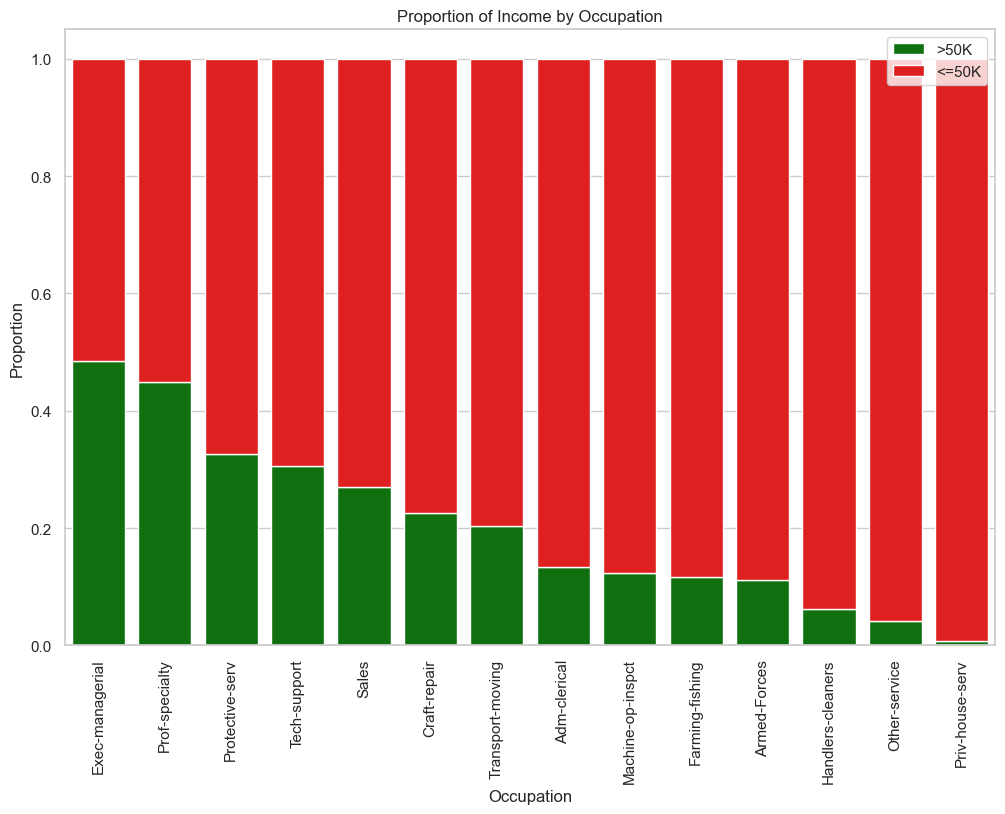

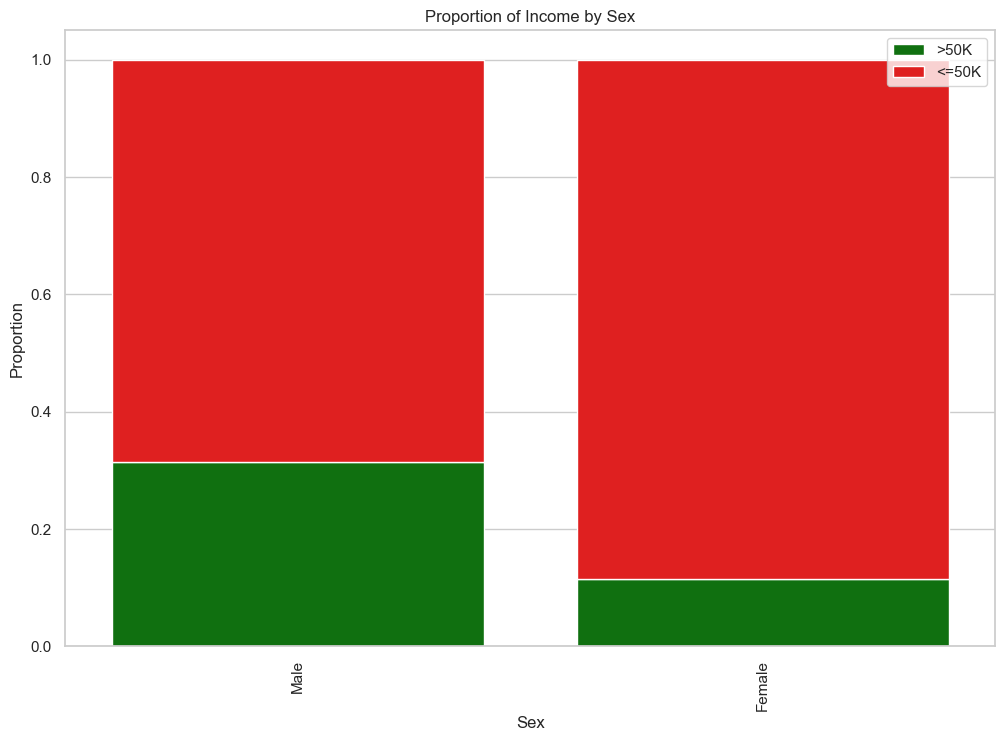

In [34]:
# group 'income' by value of 'occupation'
income_by_relationship = get_income_by_categorical_variable(df, 'occupation')

# plot categorical variable 'occupation' against 'income'
plot_income_by_categorical_variable(income_by_relationship, 'Occupation')

# group 'income' by value of 'sex'
income_by_relationship = get_income_by_categorical_variable(df, 'sex')

# plot categorical variable 'sex' against 'income'
plot_income_by_categorical_variable(income_by_relationship, 'Sex')

__Observations:__
- __Occupation:__ Being a manager or specialty professor presents higher chances of earning more than 50k dollars annually.
- Working in the farming industry, machine operators, cleaning, servers or other services present the lowest chances for earning more than 50k annually.
- __Sex:__ males present higher chance of earning more than 50k, while females have a lower chance.
- Less than 12% of females earn more than 50k dollars a year.
- More than 31% of males earn more than 50k dollars a year.

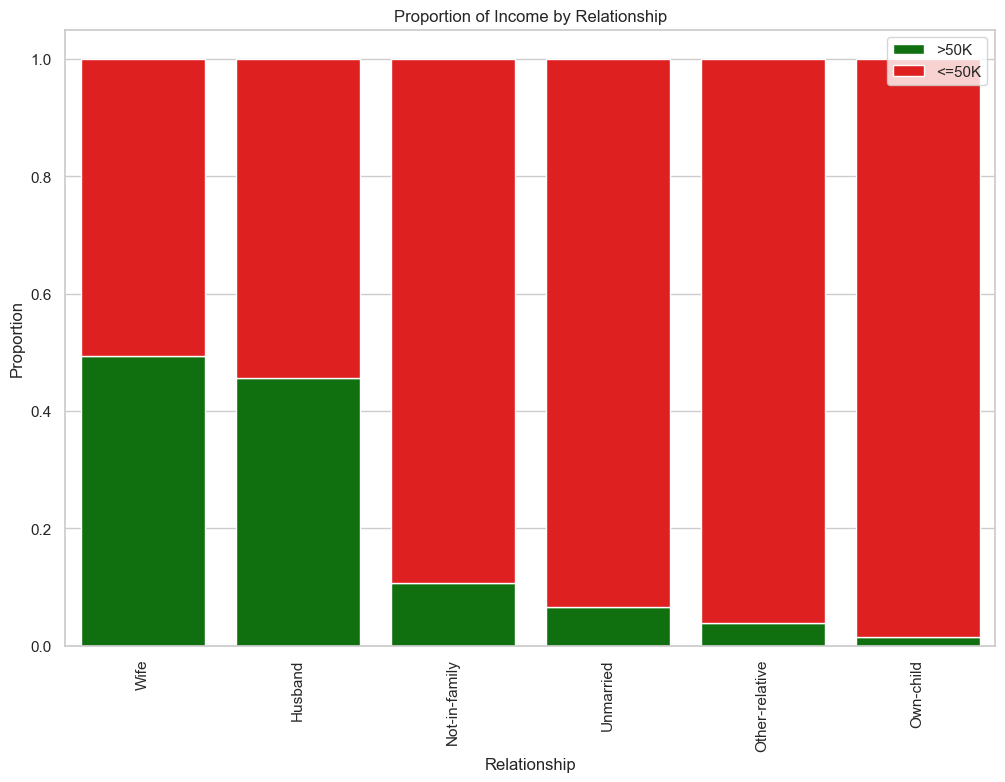

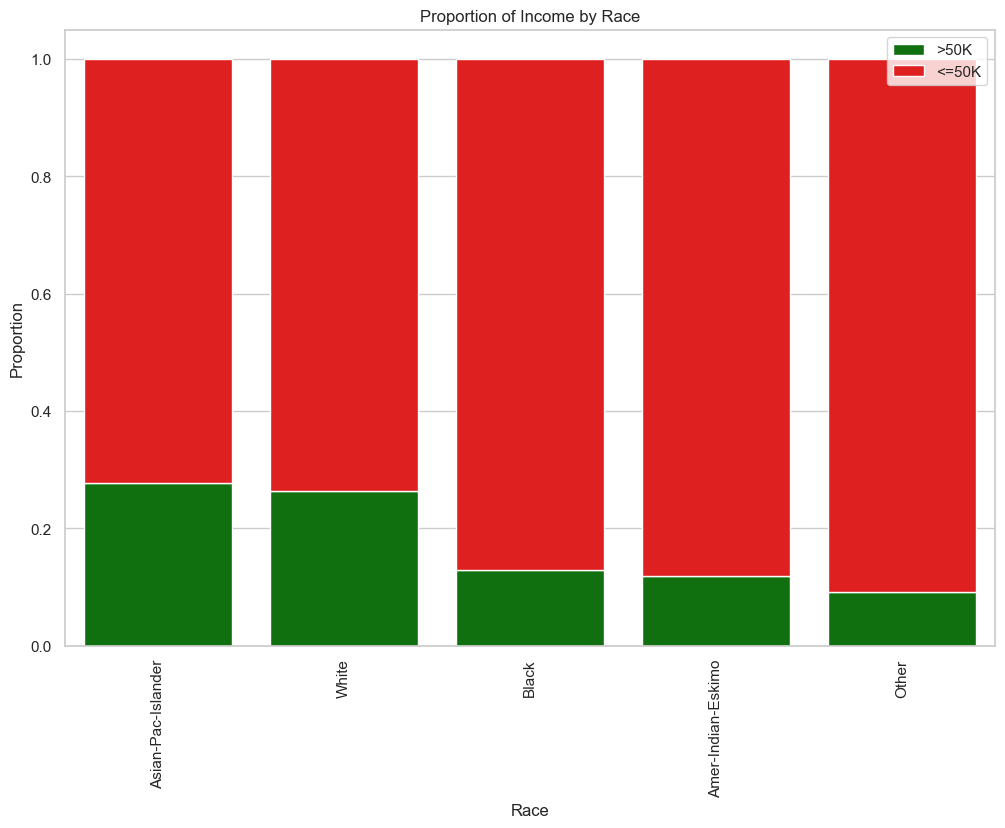

In [35]:
# group 'income' by value of 'relationship'
income_by_relationship = get_income_by_categorical_variable(df, 'relationship')

# plot categorical variable 'relationship' against 'income'
plot_income_by_categorical_variable(income_by_relationship, 'Relationship')

# group 'income' by value of 'race'
income_by_relationship = get_income_by_categorical_variable(df, 'race')

# plot categorical variable 'race' against 'income'
plot_income_by_categorical_variable(income_by_relationship, 'Race')

__Observations:__
- __Relationship:__ Being a husband or wife actually present a near 50% chance of both possible values, for both husbands and wifes.
- On the other hand, unmarried individuals, and those having own-childs, present an exorbitant lower counts of >50k earners.
- __Race__: white and asian races present a higher chance (between all races) of higher income, while black and other races show the opposite.
- There is few data about other races and our data is imbalanced, having most of individuals from white race.

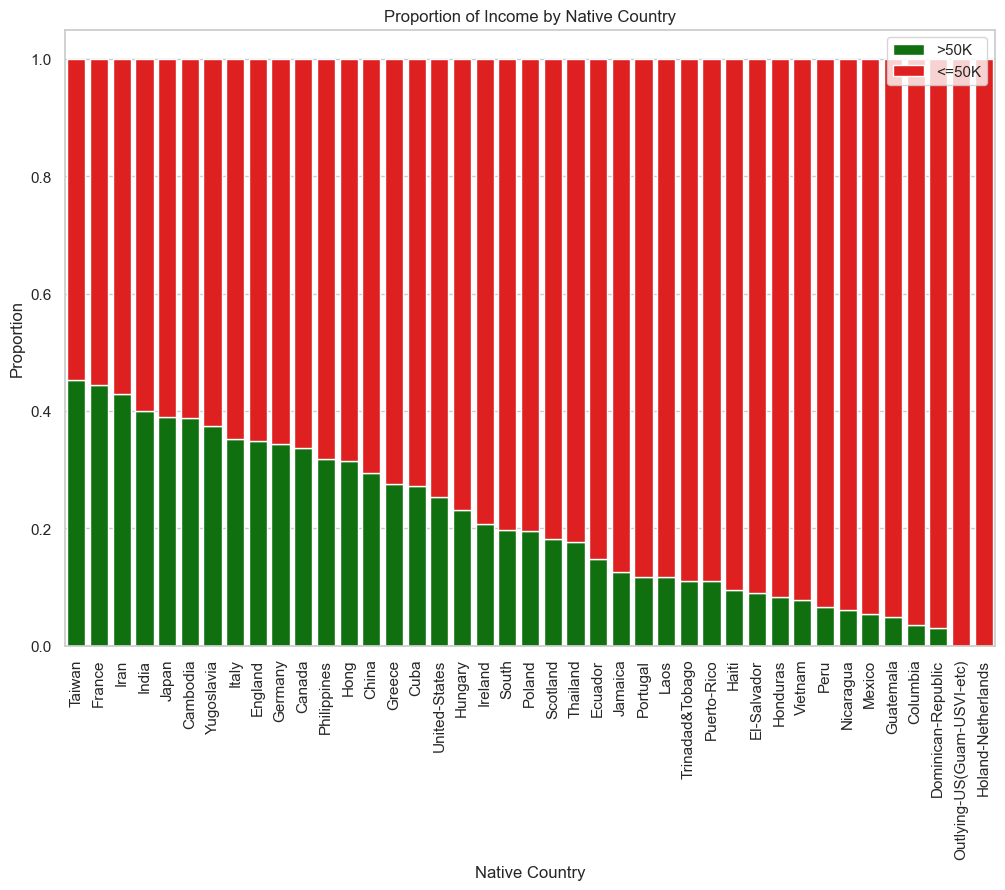

In [36]:
# Let's plot our Native country variable against the income

income_by_country = df.groupby(['native_country', 'income']).size().unstack(fill_value=0)

income_by_country['>50K'] = income_by_country['>50K'] / (income_by_country['>50K'] + income_by_country['<=50K'])
income_by_country['<=50K'] = 1 - income_by_country['>50K']

income_by_country = income_by_country.sort_values(by='>50K', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

# Stacked bar chart
sns.barplot(x=income_by_country.index, y=income_by_country['>50K'], color='green', label='>50K')
sns.barplot(x=income_by_country.index, y=income_by_country['<=50K'], color='red', bottom=income_by_country['>50K'], label='<=50K')

plt.title('Proportion of Income by Native Country')
plt.xlabel('Native Country')
plt.ylabel('Proportion')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


__Observations (Native Country):__
- Taiwan, France, and Iran present higher income for their individuals, while Holand, Dominican Republic, and Outlying-US show a lowest income.
- The probability of earning more than 50k annually seems to be represented linearly across countries in a random way, starting from Taiwan, all the way to the right until Holand-Netherlands.
- This data may be contradictory as per known strong economies around the world.

### 5. Target variable exploration

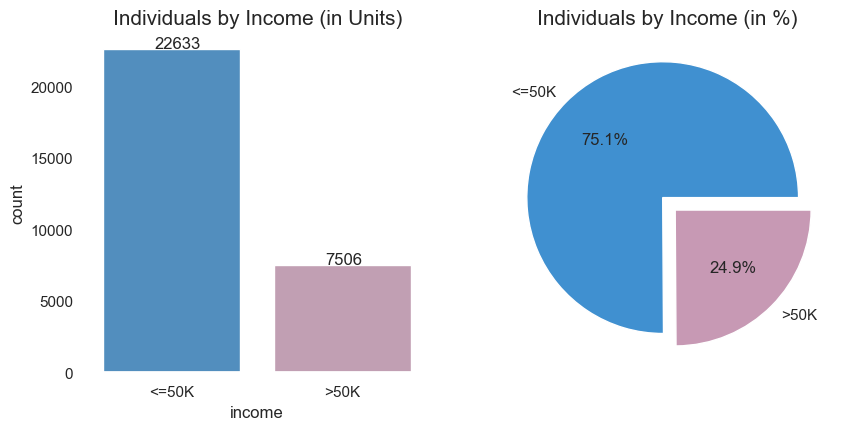

In [37]:
# Let's take a deeper look into our target: INCOME
# first we set our color palette and sizes
sns.set(rc={'axes.facecolor':'none','axes.grid':False})
my_pal = ('#4090D0','#c799b4')
my_xpl = [0.05, 0.08]

plt.subplots(figsize=(15,15))

# Plot Total Individuals by Income (count individuals)
plt.subplot(3,3,1)
plt.title('Individuals by Income (in Units)', fontdict={'fontsize':15})
ax = sns.countplot(x="income", data=df, palette=my_pal, order=df['income'].value_counts().index)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+40))

# Total Individuals by Salary (in %)
plt.subplot(3,3,2)
plt.title('Individuals by Income (in %)', fontdict={'fontsize':15})
df['income'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

plt.show()

It appears that our target variable is imbalanced as __75.1%__ of the records are individuals with __"<=50k" US dollars income__.

On the other hand, only __24.9%__ belong to the __">50k" salary segment__.

In [38]:
# Let's apply a label encoder on our target 'income' so we can convert it into a numerical variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder ()

df['income'] = le.fit_transform(df['income'])

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


When applying a label encoder on our target Income, we can except the following values:

- __0:__ individual earning "<=50k US dollars annually"
- __1:__ individual earning ">50k US dollars annually"

In [39]:
# Show basic statistics of our target
df['income'].describe()

count    30139.000000
mean         0.249046
std          0.432468
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64

__Observations:__
- Based on the quantile values, we can say that __most of individuals earn less than 50k US dollars annually__ ("0" label).
- Our __dataset is somewhat imbalanced__, showing more than __75%__ of individuals with a value of <=50k and less than 25% with >50k.

<Axes: xlabel='income', ylabel='Density'>

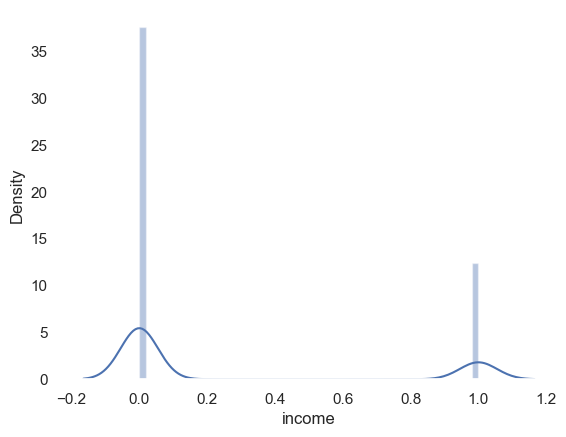

In [40]:
# Plot our target distribution
sns.distplot(df['income'])

__Observations:__
- The __distribution plot of our target variable shows that our data contains only 2 possible values (0 and 1), so we succesfully label encoded our target.__
- Once again, we can __notice a huge difference between the balance of our target values__, most of them (around 75%) having a zero value (<=50k $)

### 6. Correlation between our variables

Now let's find the correlation between our variables.

Once again we can use a label encoder to convert our variables into numerical and find the correlation coefficient.

In [41]:
# Prepare our correlation analysis between variables using a label encoder
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df_correlation=df.apply(LE.fit_transform)
df_correlation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30139 non-null  int64
 1   workclass       30139 non-null  int32
 2   fnlwgt          30139 non-null  int64
 3   education       30139 non-null  int32
 4   education_num   30139 non-null  int64
 5   marital_status  30139 non-null  int32
 6   occupation      30139 non-null  int32
 7   relationship    30139 non-null  int32
 8   race            30139 non-null  int32
 9   sex             30139 non-null  int32
 10  capital_gain    30139 non-null  int64
 11  capital_loss    30139 non-null  int64
 12  hours_per_week  30139 non-null  int64
 13  native_country  30139 non-null  int32
 14  income          30139 non-null  int64
dtypes: int32(8), int64(7)
memory usage: 2.8 MB


In [42]:
df_correlation.corr().abs().income.sort_values(ascending=False)

income            1.000000
capital_gain      0.337315
education_num     0.335413
relationship      0.251026
age               0.242205
hours_per_week    0.232287
sex               0.216668
marital_status    0.193404
capital_loss      0.162057
education         0.079039
race              0.071689
occupation        0.051476
native_country    0.023041
workclass         0.018030
fnlwgt            0.010010
Name: income, dtype: float64

The correlation coefficient shows that most of our variables are not that correlated to our target.

However, the most correlated variables are:
- capital_gain
- education_num
- relationship
- age
- hours_per_week

Meanwhile, the least correlated variables are:
- final weight
- workclass
- native_country
- occupation

We can also visualize this, using a heatmap.

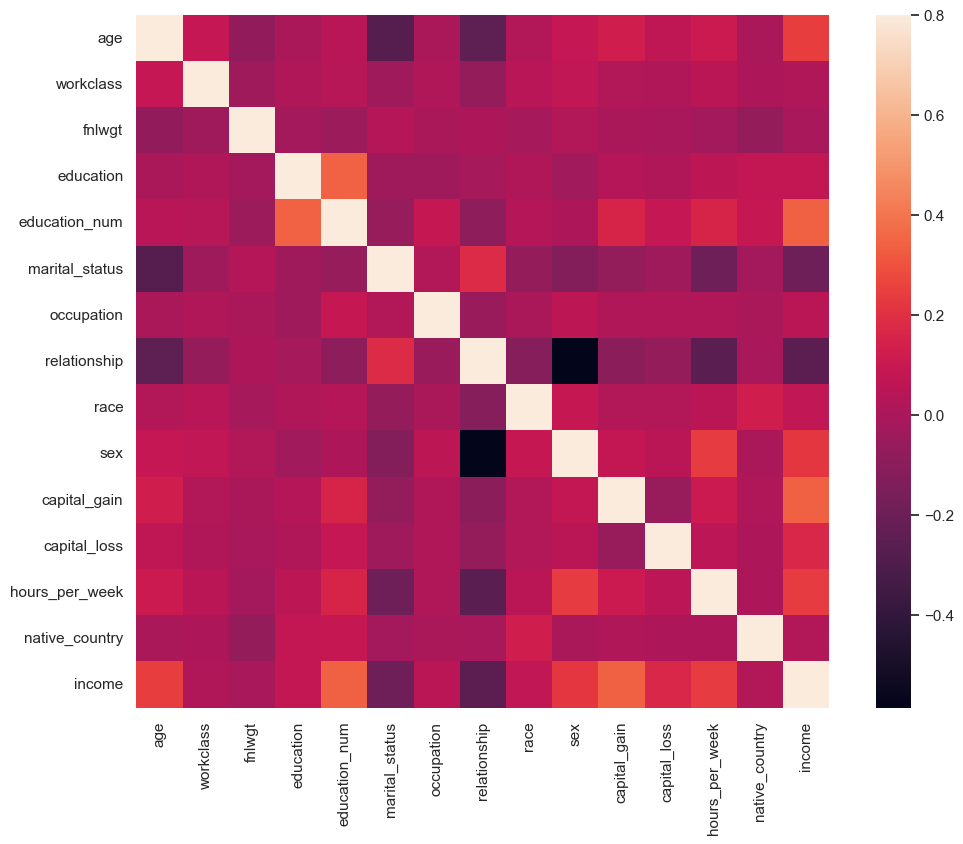

In [43]:
corr = df_correlation.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

__Observations:__
- The correlation between our variables and the individual's income tells us that education and capital gain (how much does the individual earn a year) are the most important factors that determine if a person earns more than 50k dollars.
- Other correlated variables are Age and Relationship, meaning individuals income may vary depending on their age (probably because of experience), and relationships (if they have family support, or are married).
- Surprisignly the occupation and workclass, are two of the least correlated variables to the income.

### 7. Handling Outliers

Outliers can be dangerous for our models accuracy.

To handle outliers we should first identify them and then apply a technique to properly handle them based on the amount of outliers.

To __detect outliers we find rows that have values (on any column) outside from the Interquantile Range (IQR)__ which is defined as the 3rd Quartile - 1st Quartile.

In [44]:
# Calculate Q1 and Q3
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Display 1st and 3rd quantiles
print('-'*10, 'Q1', '-'*10)
display(Q1)
print('-'*10, 'Q3', '-'*10)
display(Q3)

# Calculate IQR
IQR = Q3 - Q1
print('-'*10, 'IQR', '-'*10)
display(IQR)

---------- Q1 ----------


age                   28.0
fnlwgt            117627.5
education_num          9.0
capital_gain           0.0
capital_loss           0.0
hours_per_week        40.0
income                 0.0
Name: 0.25, dtype: float64

---------- Q3 ----------


age                   47.0
fnlwgt            237604.5
education_num         13.0
capital_gain           0.0
capital_loss           0.0
hours_per_week        45.0
income                 0.0
Name: 0.75, dtype: float64

---------- IQR ----------


age                   19.0
fnlwgt            119977.0
education_num          4.0
capital_gain           0.0
capital_loss           0.0
hours_per_week         5.0
income                 0.0
dtype: float64

In [45]:
# Find the number of outliers per numerical column
for col in numerical_columns:
    outliers = df[(df[col] < Q1[col]) | (df[col] > Q3[col])]
    print(f"For column '{col}' there are {outliers.shape[0]} outliers identified.")

For column 'age' there are 14532 outliers identified.
For column 'fnlwgt' there are 15070 outliers identified.
For column 'education_num' there are 6279 outliers identified.
For column 'capital_gain' there are 2538 outliers identified.
For column 'capital_loss' there are 1427 outliers identified.
For column 'hours_per_week' there are 13546 outliers identified.


Since we are getting __too many outliers using the standard definition of outlier (outside the IQR)__,

we will try finding more extreme outliers.

This time we will use __only the top and lower 1% (1 and 99 percentiles).__

In [46]:
# Calculate Q1 and Q3
p1 = df.quantile(0.01)
p99 = df.quantile(0.99)

# Display percentiles
print('-'*10, 'p1', '-'*10)
display(p1)
print('-'*10, 'p99', '-'*10)
display(p99)

# Calculate new range
new_range = p99 - p1
print('-'*10, 'New Range', '-'*10)
display(new_range)

---------- p1 ----------


age                  17.00
fnlwgt            27156.42
education_num         3.00
capital_gain          0.00
capital_loss          0.00
hours_per_week       10.00
income                0.00
Name: 0.01, dtype: float64

---------- p99 ----------


age                   72.00
fnlwgt            511205.02
education_num         16.00
capital_gain       15024.00
capital_loss        1980.00
hours_per_week        80.00
income                 1.00
Name: 0.99, dtype: float64

---------- New Range ----------


age                   55.0
fnlwgt            484048.6
education_num         13.0
capital_gain       15024.0
capital_loss        1980.0
hours_per_week        70.0
income                 1.0
dtype: float64

In [47]:
# Find the number of outliers per numerical column and save them in a dictionary
outliers = {}
for col in numerical_columns:
    outliers_col = df[(df[col] < p1[col]) | (df[col] > p99[col])]
    print(f"For column '{col}' there are {outliers_col.shape[0]} outliers identified.")
    outliers[col] = outliers_col

For column 'age' there are 289 outliers identified.
For column 'fnlwgt' there are 604 outliers identified.
For column 'education_num' there are 193 outliers identified.
For column 'capital_gain' there are 240 outliers identified.
For column 'capital_loss' there are 295 outliers identified.
For column 'hours_per_week' there are 484 outliers identified.


Now we have __identified__ less and __more extreme outliers__, __let's visualize them in scatterplots.__

For the next plots we have drawn the 1 and 99 percentiles as red lines.

- __Any point on top of the upper red line (99 percentile) will be considered an outlier.__

- __Any point under the lower red line (1 percentile) will also be considered an outlier.__

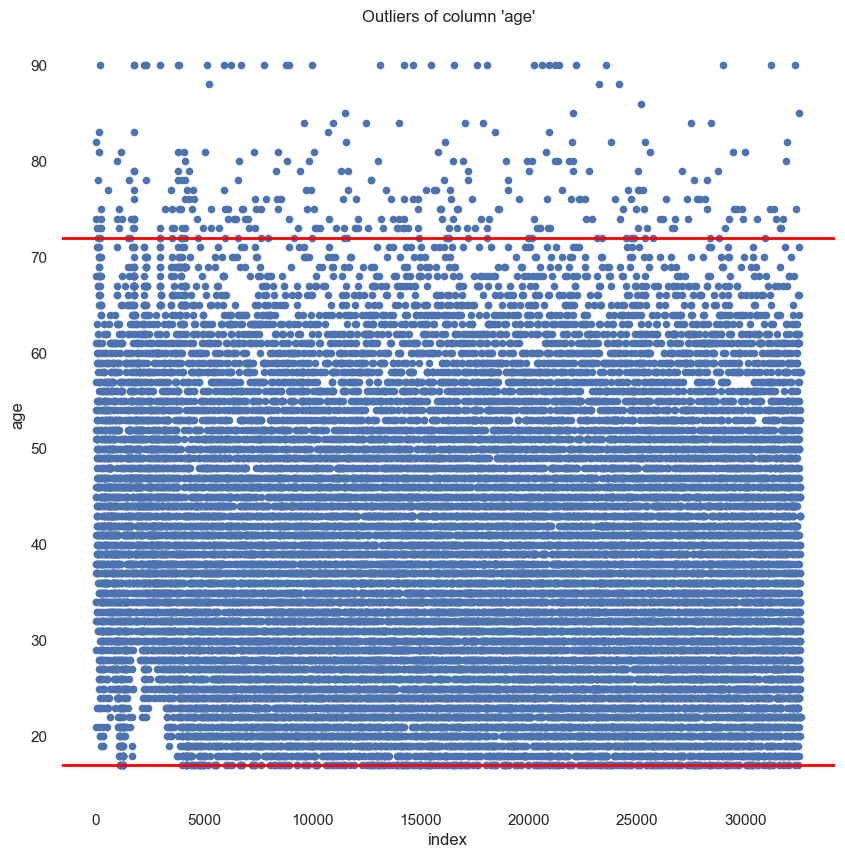

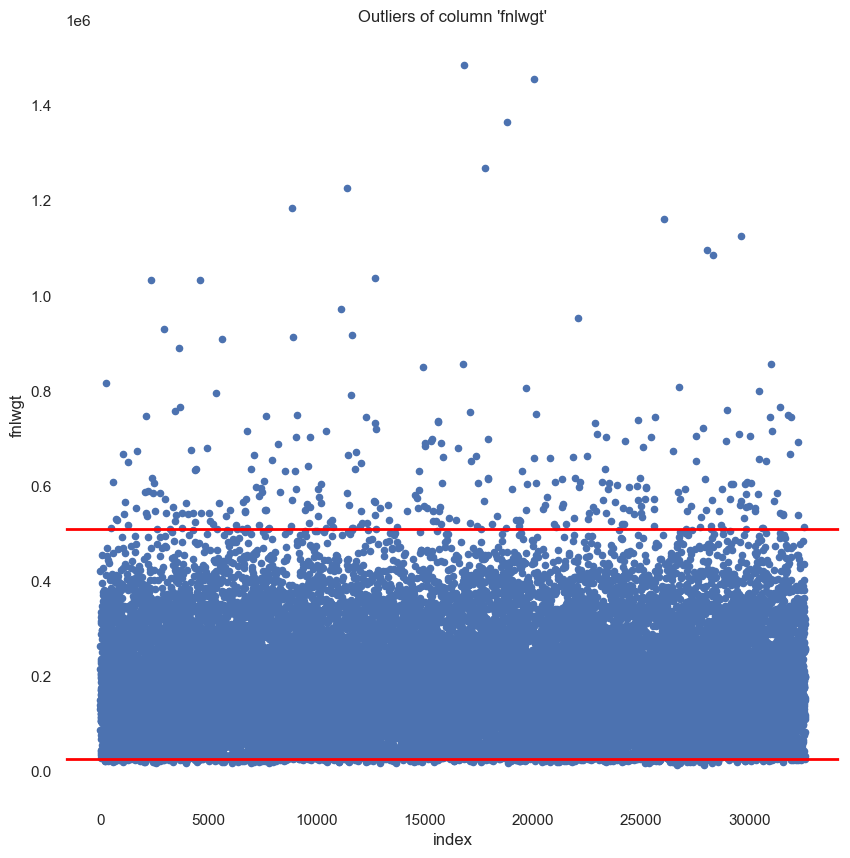

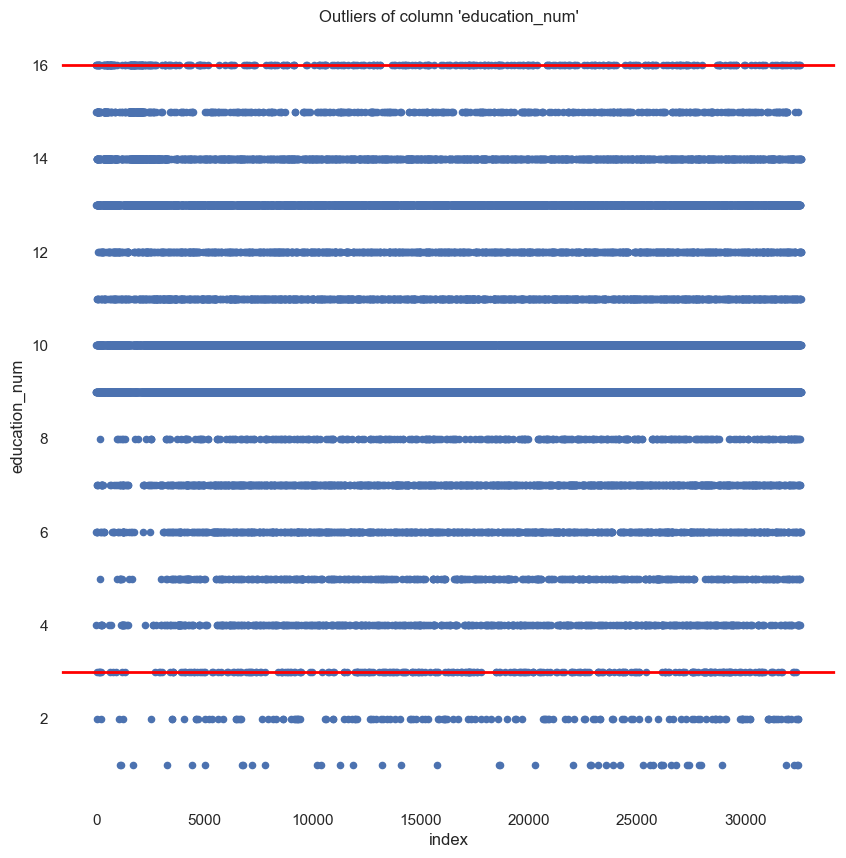

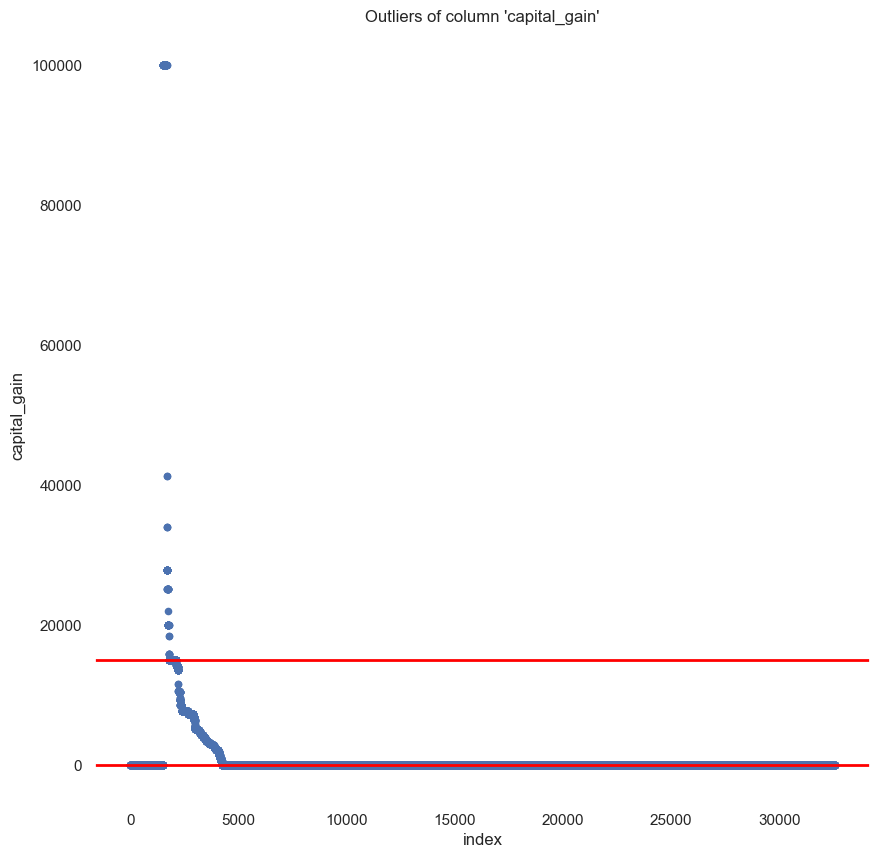

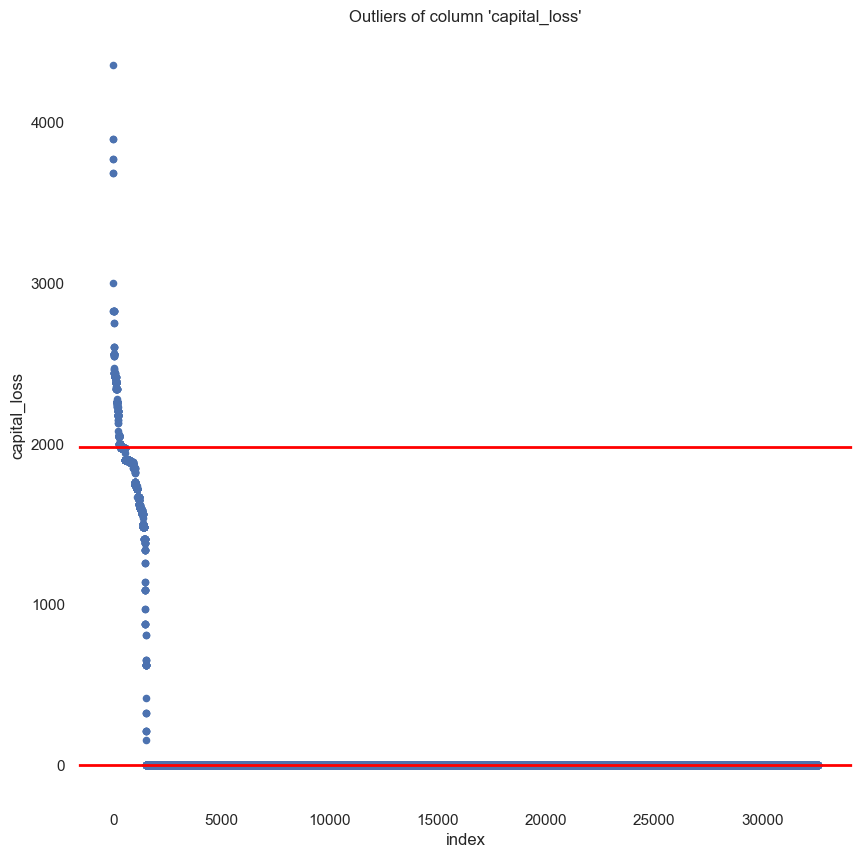

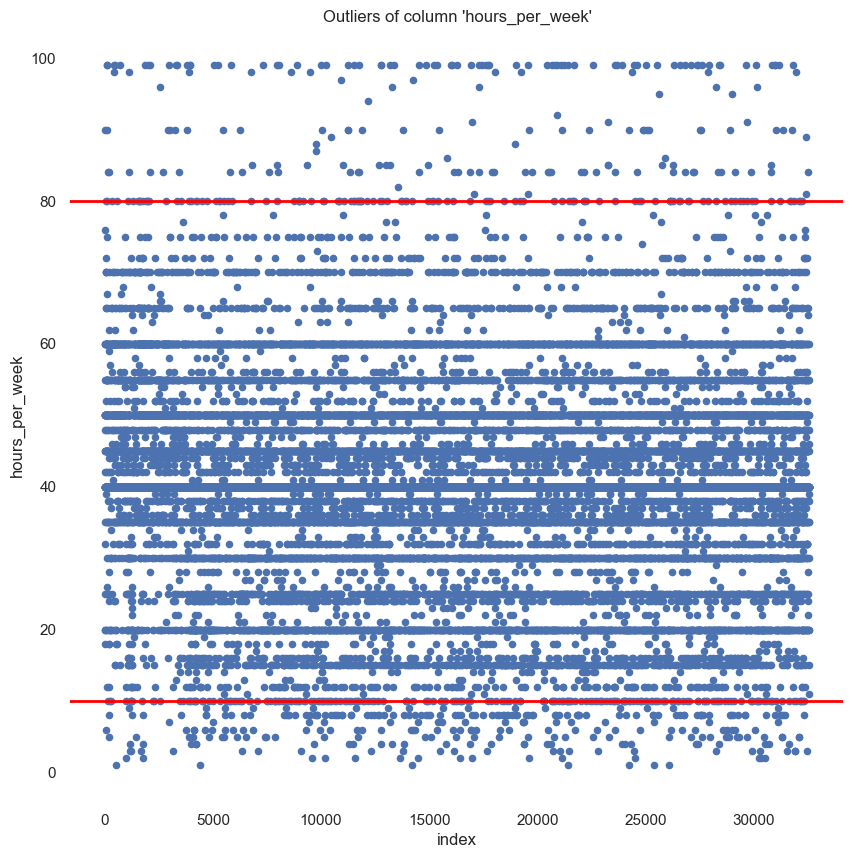

In [48]:
# Plot outliers in scatterplots, with thresholds as red lines
for col in numerical_columns:
    plot = df.reset_index().plot(kind='scatter', x='index', y=col, figsize=(10,10), title=f"Outliers of column '{col}'")
    plot.axhline(y=p1[col], color= 'red', linewidth=2,)
    plot.axhline(y=p99[col], color= 'red', linewidth=2,)

Now that we have identied and visualized outliers for each column. __Let's actually remove them from our dataframe.__

First we have to __join them on a separate dataframe and drop duplicates__ (as some of them may be duplicated from different columns).

In [49]:
# create a dataframe for all outliers (from all columns)
df_concat = pd.DataFrame()

# the outliers dictionary contains the numerical columns as key, and their dataframe of outliers as the value
for col, df_outliers in outliers.items():
    df_concat = pd.concat([df_concat, df_outliers])

df_concat

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
47,73,Self-emp-not-inc,233882,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,2457,40,Vietnam,0
116,78,Self-emp-inc,188044,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,40,United-States,1
118,83,Self-emp-inc,153183,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32340,23,Federal-gov,173851,HS-grad,9,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,8,United-States,0
32409,55,Private,199763,HS-grad,9,Separated,Protective-serv,Not-in-family,White,Male,0,0,81,United-States,0
32417,42,Private,288154,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,89,United-States,1
32468,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,0


In [50]:
# Let's drop duplicates from our outliers dataframe
df_final_outliers = df_concat.drop_duplicates()
df_final_outliers

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,1
47,73,Self-emp-not-inc,233882,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Asian-Pac-Islander,Male,0,2457,40,Vietnam,0
116,78,Self-emp-inc,188044,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,40,United-States,1
118,83,Self-emp-inc,153183,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32101,18,Private,36162,11th,7,Never-married,Craft-repair,Own-child,White,Male,0,0,5,United-States,0
32340,23,Federal-gov,173851,HS-grad,9,Never-married,Armed-Forces,Not-in-family,White,Male,0,0,8,United-States,0
32409,55,Private,199763,HS-grad,9,Separated,Protective-serv,Not-in-family,White,Male,0,0,81,United-States,0
32417,42,Private,288154,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,89,United-States,1


In [51]:
print(f'\033[94mNumber of outliers detected: {df_final_outliers.shape[0]}')
print(f'\033[94mNumber of rows in the original dataset: {df.shape[0]}')
print(f'\033[94mPercentage of outliers: {round(df_final_outliers.shape[0]*100/df.shape[0],2)} %')


Number of outliers detected: 1993
Number of rows in the original dataset: 30139
Percentage of outliers: 6.61 %


Finally, let's __remove the outliers from the original dataset__.

In [52]:
# Remove outliers using merge from pandas library
df_without_outliers = pd.merge(df, # original dataset
                               df_final_outliers, # outliers dataset
                               indicator=True,
                               how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
df_without_outliers

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
295,27,Private,124953,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,1980,40,United-States,0
296,27,Private,116358,Some-college,10,Never-married,Craft-repair,Own-child,Asian-Pac-Islander,Male,0,1980,40,Philippines,0
297,35,Private,187119,Bachelors,13,Divorced,Sales,Not-in-family,White,Female,0,1980,65,United-States,0
298,31,Self-emp-not-inc,161745,Bachelors,13,Married-spouse-absent,Exec-managerial,Not-in-family,White,Male,0,1980,60,United-States,0
299,27,Federal-gov,469705,HS-grad,9,Never-married,Craft-repair,Not-in-family,Black,Male,0,1980,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
30135,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
30136,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
30137,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [53]:
print(f"\033[94mAfter deleting outliers we are left with {df_without_outliers.shape[0]} rows from the original dataset.")

After deleting outliers we are left with 28146 rows from the original dataset.


We can also __plot some boxplots again using our clean dataset to visualize the difference after deleting outliers.__

| ---- Before (Left) ---- | VS | ---- After (Right) ---- |




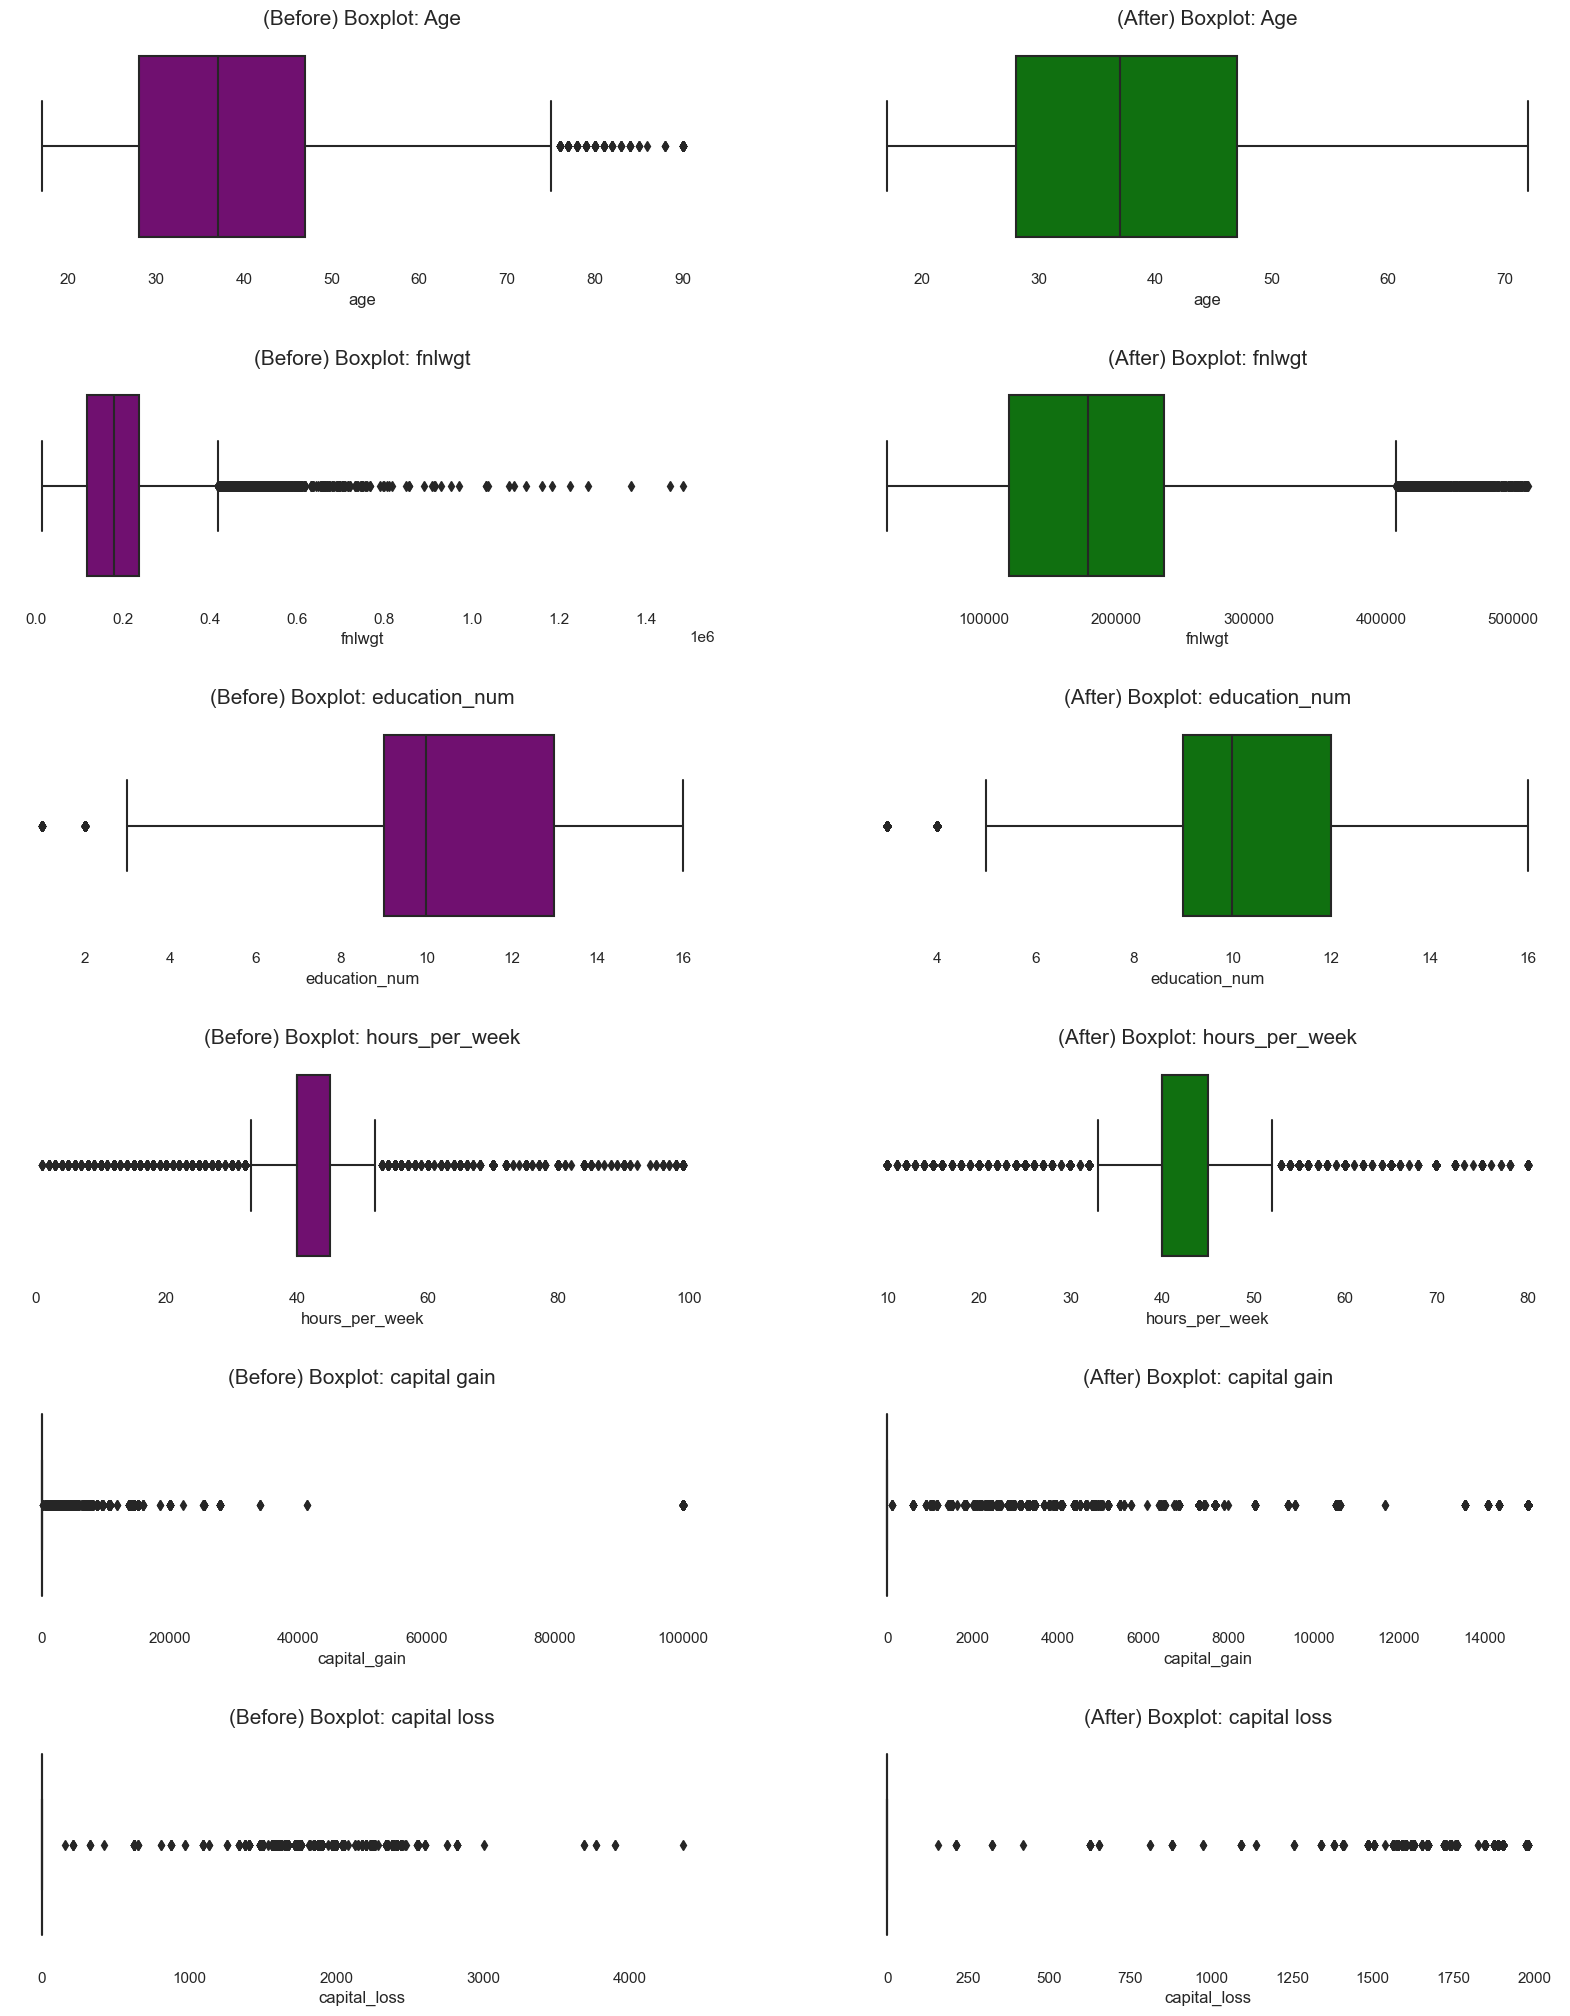

In [54]:
# plotting boxplots for all numerical variables before and after deleting outliers
plt.subplots(figsize=(20,25))
plt.subplots_adjust(hspace=0.5)

plt.subplot(6,2,1)
plt.title('(Before) Boxplot: Age', fontdict={'fontsize':15})
sns.boxplot(x=df['age'], orient='h',color="purple")

plt.subplot(6,2,2)
plt.title('(After) Boxplot: Age', fontdict={'fontsize':15})
sns.boxplot(x=df_without_outliers['age'], orient='h',color="green")

plt.subplot(6,2,3)
plt.title('(Before) Boxplot: fnlwgt', fontdict={'fontsize':15})
sns.boxplot(x=df['fnlwgt'], orient='h',color="purple")

plt.subplot(6,2,4)
plt.title('(After) Boxplot: fnlwgt', fontdict={'fontsize':15})
sns.boxplot(x=df_without_outliers['fnlwgt'], orient='h',color="green")

plt.subplot(6,2,5)
plt.title('(Before) Boxplot: education_num', fontdict={'fontsize':15})
sns.boxplot(x=df['education_num'], orient='h',color="purple")

plt.subplot(6,2,6)
plt.title('(After) Boxplot: education_num', fontdict={'fontsize':15})
sns.boxplot(x=df_without_outliers['education_num'], orient='h',color="green")

plt.subplot(6,2,7)
plt.title('(Before) Boxplot: hours_per_week', fontdict={'fontsize':15})
sns.boxplot(x=df['hours_per_week'], orient='h',color="purple")

plt.subplot(6,2,8)
plt.title('(After) Boxplot: hours_per_week', fontdict={'fontsize':15})
sns.boxplot(x=df_without_outliers['hours_per_week'], orient='h',color="green")

plt.subplot(6,2,9)
plt.title('(Before) Boxplot: capital gain', fontdict={'fontsize':15})
sns.boxplot(x=df['capital_gain'], orient='h',color="purple")

plt.subplot(6,2,10)
plt.title('(After) Boxplot: capital gain', fontdict={'fontsize':15})
sns.boxplot(x=df_without_outliers['capital_gain'], orient='h',color="green")

plt.subplot(6,2,11)
plt.title('(Before) Boxplot: capital loss', fontdict={'fontsize':15})
sns.boxplot(x=df['capital_loss'], orient='h',color="purple")

plt.subplot(6,2,12)
plt.title('(After) Boxplot: capital loss', fontdict={'fontsize':15})
sns.boxplot(x=df_without_outliers['capital_loss'], orient='h',color="green")

print("|", "-"*4, "Before (Left)", "-"*4, "| VS |", "-"*4, "After (Right)", "-"*4, "|", end="\n\n\n")
plt.show()

__Observations:__
- We are comparing our numerical variables __before (left) and after (right) deleting outliers.__
- When taking a close look to the __x-axis scale__, we can visualize that boxplots __before deleting outliers show a higher scale, while boxplots after deleting outliers show lower scale.__
- Even though the right boxplots are showing __quite a few points plotted as outliers__, we can __visualize a significant reduction in outlier points__ when comparing before vs after.